# Hubmap to zarr

> Convert tiff files to zarr files with scale factor

In [1]:
!pip install slideio
!pip install -qq zarr
# Install zarr and load packages
import cv2, zarr, tifffile
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from pathlib import Path
import slideio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 60.4 MB/s eta 0:00:0000:0100:01


In [6]:
scale = None

g_out = zarr.group(f'working/train_scale{scale}')

In [2]:


idxs = ['', '', '']

for idx in idxs:

    image = slideio.open_slide(f'external/{idx}.svs','SVS').get_scene(0).read_block()

    # img = image[:,:25000,:] #optional
    img.shape


    plt.imshow(cv2.resize(img,(img.shape[1]//10,img.shape[0]//10)))

    g_out[idx] = img

In [3]:
def read_image(image_id, scale=None, verbose=1):
    "Load images with ID from path"
    
    image = tifffile.imread(f"external/{image_id}.tiff")
    
    if len(image.shape) == 5:
        image = image.squeeze().transpose(1, 2, 0)
    elif image.shape[0] == 3:
        image = image.transpose(1, 2, 0)
    
    if verbose:
        print(f"[{image_id}] Image shape: {image.shape}")
    
    if scale:
        new_size = (image.shape[1] // scale, image.shape[0] // scale)
        image = cv2.resize(image, new_size)
        
        if verbose:
            print(f"[{image_id}] Resized Image shape: {image.shape}")
        
    return image

In [4]:
def read_svs(image_id, scale=None, verbose=1):
    "Load images with ID from path"
    scene = slideio.open_slide(f'external/{image_id}.svs','SVS').get_scene(0)
    image = scene.read_block()
    
    # if len(image.shape) == 5:
    #     image = image.squeeze().transpose(1, 2, 0)
    # elif image.shape[0] == 3:
    #     image = image.transpose(1, 2, 0)
    
    if verbose:
        print(f"[{image_id}] Image shape: {image.shape}")
    
    if scale:
        new_size = (image.shape[1] // scale, image.shape[0] // scale)
        image = cv2.resize(image, new_size)
        
        if verbose:
            print(f"[{image_id}] Resized Image shape: {image.shape}")
        
    return image

In [5]:
idx = 'GTEX-11P82-1126'
scene = slideio.open_slide(f'external/{idx}.svs','SVS').get_scene(0).read_block()


In [6]:
image = scene.read_block()

In [18]:
image.shape

(34874, 57767, 3)

In [7]:
img = image[:,:25000,:]
plt.imshow(cv2.resize(img,(img.shape[1]//10,img.shape[0]//10)))

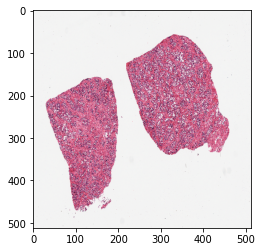

In [48]:
plt.imshow(cv2.resize(image, dsize=(512, 512)))
plt.show()

# Settings

In [9]:
scale = None

g_out = zarr.group(f'working/train_scale{scale}')

In [15]:
scale = None

path = Path('/storage/data/kaggle')
df_train = pd.read_csv(path/"train.csv")
g_out = zarr.group(f'working/train_scale{scale}')

In [7]:
# for idx in df_train['id']:
#     img = read_image(idx, path, scale=scale)
#     break

[10044] Image shape: (3000, 3000, 3)


In [14]:
img.shape

(34874, 25000, 3)

In [12]:
idx = 'GTEX-11P82-1126'
image = slideio.open_slide(f'external/{idx}.svs','SVS').get_scene(0).read_block()

img = image[:,:25000,:] #optional
img.shape


plt.imshow(cv2.resize(img,(img.shape[1]//10,img.shape[0]//10)))

g_out[idx] = img

# Here!

In [ ]:
scale = None

g_out = zarr.group(f'working/train_scale{scale}')

In [ ]:
idxs = ['', '', '']
for idx in idxs:

    image = slideio.open_slide(f'external/{idx}.svs','SVS').get_scene(0).read_block()

    # img = image[:,:25000,:] #optional
    img.shape


    plt.imshow(cv2.resize(img,(img.shape[1]//10,img.shape[0]//10)))

    g_out[idx] = img

## Loop over images

In [4]:
new_list = ['CL_HandE_1234_B004_bottomright',
'CL_HandE_1234_B004_topright',
'HandE_B005_CL_b_RGB_bottomright',
'HandE_B005_CL_b_RGB_topleft',
'CL_HandE_1234_B004_bottomleft',
'HandE_B005_CL_b_RGB_bottomleft',
'CL_HandE_1234_B004_topleft'
]

In [ ]:
# for idx in new_list:
#     img = read_image(idx, scale=scale)
#     g_out[idx] = img
#     print(g_out[idx].info)
    
#     plt.imshow(cv2.resize(img, dsize=(512, 512)))
#     plt.show()

In [ ]:
# for idx in new_list:
#     img = read_svs(idx, scale=scale)
#     g_out[idx] = img
#     print(g_out[idx].info)
    
#     plt.imshow(cv2.resize(img, dsize=(512, 512)))
#     plt.show()

In [ ]:
# for idx in df_train['id']:
#     img = read_image(idx, path, scale=scale)
#     g_out[idx] = img
#     print(g_out[idx].info)
    
#     plt.imshow(cv2.resize(img, dsize=(512, 512)))
#     plt.show()